In [87]:
import hashlib
import random
import string
import matplotlib.pyplot as plt

In [88]:
def generate_random_string(length):
    return ''.join(random.choice(string.ascii_letters) for _ in range(length))

# Генерация данных
actual_items = [generate_random_string(5) for _ in range(1000)]  # 1000 элементов
test_items = [generate_random_string(5) for _ in range(10000)]     # 10000 тестовых элементов

### Задание №1: Фильтр Блума

##### 1. Реализация фильтра Блума

In [89]:
class BloomFilter:
    def __init__(self, size, hash_count):
        self.size = size
        self.hash_count = hash_count
        self.bit_array = [0] * size

    def _hash(self, item, seed):
        hash_value = int(hashlib.md5((str(item) + str(seed)).encode()).hexdigest(), 16)
        return hash_value % self.size

    def add(self, item):
        for seed in range(self.hash_count):
            index = self._hash(item, seed)
            self.bit_array[index] = 1

    def __contains__(self, item):
        for seed in range(self.hash_count):
            index = self._hash(item, seed)
            if self.bit_array[index] == 0:
                return False
        return True

##### 2. Определение процента ложноположительных срабатываний

In [90]:
def false_positive_rate(bloom, test_items, actual_items):
    false_positives = 0
    for item in test_items:
        if item in bloom and item not in actual_items:
            false_positives += 1
    return false_positives / len(test_items)

##### 3. Оценка зависимости ложноположительных срабатываний от размерности массива и числа хеш-функций


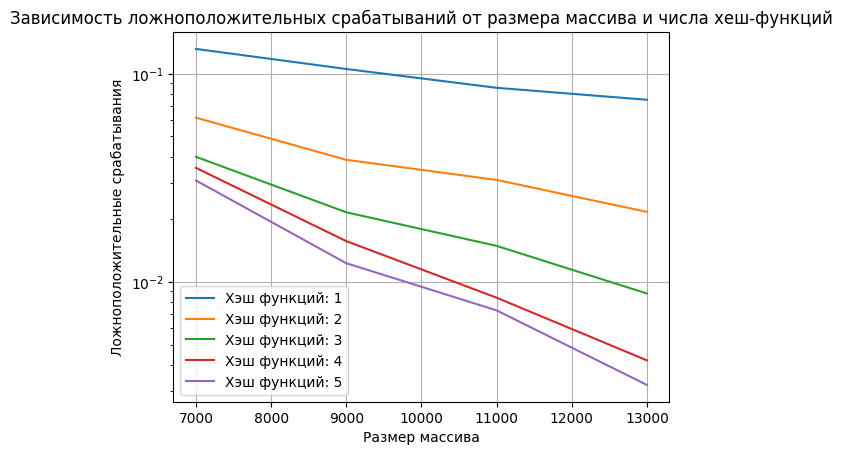

Размер	Количество хэш	Процент ложноположительных срабатываний
7000	1		13.16%
7000	2		6.15%
7000	3		3.99%
7000	4		3.53%
7000	5		3.07%
9000	1		10.54%
9000	2		3.86%
9000	3		2.16%
9000	4		1.57%
9000	5		1.23%
11000	1		8.56%
11000	2		3.09%
11000	3		1.49%
11000	4		0.84%
11000	5		0.73%
13000	1		7.50%
13000	2		2.17%
13000	3		0.88%
13000	4		0.42%
13000	5		0.32%


In [ ]:
def evaluate_bloom_filter(size_range, hash_count_range, actual_items, test_items):
    results = []
    for size in size_range:
        for hash_count in hash_count_range:
            bloom = BloomFilter(size=size, hash_count=hash_count)
            for item in actual_items:
                bloom.add(item)
            rate = false_positive_rate(bloom, test_items, actual_items)
            results.append((size, hash_count, rate))
    return results

# Параметры для оценки
size_range = range(7000, 15000, 2000)  # Размеры битового массива
hash_count_range = range(3, 6)       # Количество хеш-функций

# Запуск оценки
results = evaluate_bloom_filter(size_range, hash_count_range, actual_items, test_items)

# Построение графиков
for hash_count in hash_count_range:
    x = [size for size, hc, rate in results if hc == hash_count]
    y = [rate for size, hc, rate in results if hc == hash_count]
    plt.plot(x, y, label=f"Хэш функций: {hash_count}")

plt.xlabel("Размер массива")
plt.ylabel("Ложноположительные срабатывания")
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.title("Зависимость ложноположительных срабатываний от размера массива и числа хеш-функций")
plt.show()

# Вывод результатов
print("Размер\tКоличество хэш\tПроцент ложноположительных срабатываний")
for size, hash_count, rate in results:
    print(f"{size}\t{hash_count}\t\t{rate * 100:.2f}%")